In [18]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2 
from pianoq_results.scan_result import ScanResult
from pianoq.misc.mplt import mplot, mimshow
import glob 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


G:\My Drive\Projects\DMD\quantum\Results\Scans\2025_09_01_10_33_48_steps_3_150_timetagger_z_12_fiber_100um_fiber_50um_260mW_f_none_before_crystal_filter_20nm.scan


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Coincidences  - no accidentals'}>)

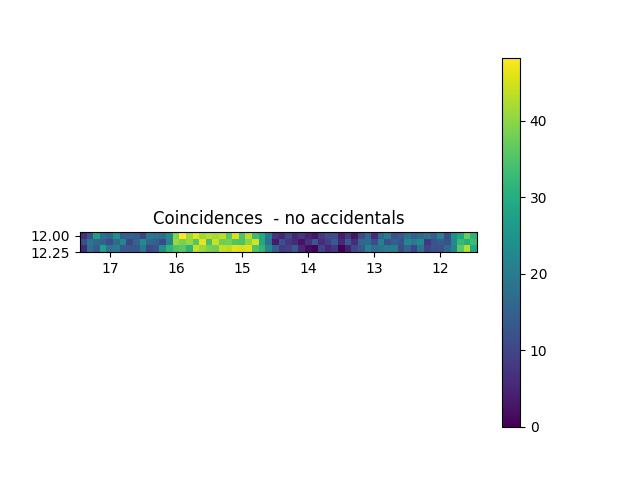

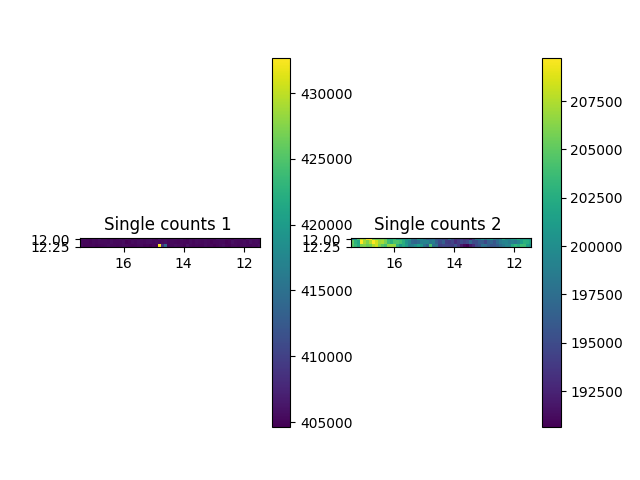

In [53]:
# foo = '09_46_07' 
# foo = '10_00_16_steps_3'
foo = '10_33_48_steps_3_150'
# foo = '11_13_42_steps_2_150'

path = glob.glob(fr'G:\My Drive\Projects\DMD\quantum\Results\Scans\*{foo}*.scan')[0]
print(path)
res = ScanResult(path)
# mplot(res.X, res.real_coins.sum(axis=0), figshow=False)
res.show(figshow=False, show_singles=True)